In [0]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from skimage import transform
from tqdm import tqdm

In [0]:
import warnings
warnings.filterwarnings("ignore")

### Данные:
Будем работать с датасетом [FashionMNIST](https://github.com/zalandoresearch/fashion-mnist). 

In [0]:
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

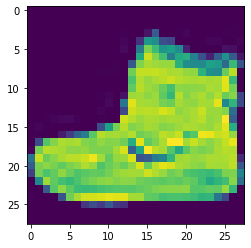

In [7]:
plt.imshow(X_train[0].reshape([28,28]))

### Задание:
Будем решать задачу классификации на 10 классов. Каждый класс соответствует одному из типов одежды. Исходная размерность признакового пространства: `784`, каждый пиксель является признаком. Будем снижать размерность признакового пространства с помощью метода главных компонент (`PCA`). Ваша задача оценить качество решенения задачи классификации по метрике `accuracy` в зависимости от числа главных компонент. Также оцените дисперсию функции качества в зависимости от числа главных компонент.

Нарисуйте график зависимости функции качества и ее дисперсии от числа главных компонент.

In [0]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

In [9]:
pca = PCA(n_components=3)
used_indices = np.random.choice(np.arange(X_train.shape[0]), 10000, replace=False)
X_train_lowdim = pca.fit_transform(X_train[used_indices].reshape([-1, 784]))
lr = LogisticRegression()
lr.fit(X_train_lowdim, y_train[used_indices])
accuracy_score(y_test, lr.predict(pca.transform(X_test.reshape([-1, 784]))))

0.5621

Используйте следующую сетку числа главных компонент: `[3, 5, 7, 12, 18, 25, 33, 40, 48, 55]`. Для ускорения сходимости можете семплировать подвыборки из `X_train`. 

In [0]:
### Your code here

In [0]:
n_components = [3, 5, 7, 12, 18, 25, 33, 40, 48, 55]

pipeline = Pipeline([
    ('compression', PCA(n_components=3)),
    ('classification', LogisticRegression())
])

Для каждого количества главных компонент обучение 5 моделей с помощью кросс валидации. На выходе получаем матрицу 10x5 с значениями ```accuracy```

In [23]:
cv = 5
scores = np.zeros([len(n_components), cv])

for i, n_component in tqdm(enumerate(n_components), position=0):
    pipeline = pipeline.set_params(compression__n_components=n_component)
    score = cross_val_score(pipeline, X_train.reshape(-1, 784), y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    scores[i] = score

10it [05:40, 39.07s/it]


График ```accuracy``` в зависимости от количества компонент PCA. Дисперсия достаточно маленькая и не видна на графике

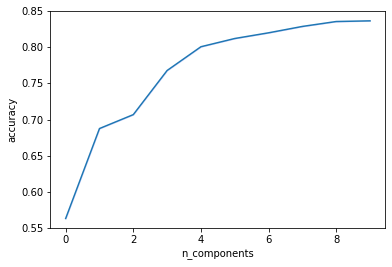

In [42]:
mean = scores.mean(axis=-1)
var = scores.var(axis=-1)

fig, ax = plt.subplots()
plt.xlabel('n_components')
plt.ylabel('accuracy')
ax.plot(mean)
ax.fill_between(range(len(mean)), (mean-var), (mean+var), color='b', alpha=.1)

Визуализация дисперсии в зависимости от количества главных компонент

<BarContainer object of 10 artists>

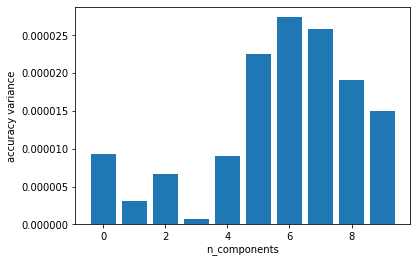

In [43]:
plt.xlabel('n_components')
plt.ylabel('accuracy variance')
plt.bar(range(len(var)), var)